# 6. 综合练习

In [307]:
import numpy as np
import pandas as pd
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 显示所有列
pd.set_option('display.max_columns', 600)

##  一、2002 年-2018 年上海机动车牌照拍卖

In [2]:
# MVL = Motor Vehicle License
## lowest price有空格，为‘lowest price ’
MVL = pd.read_csv('./2002年-2018年上海机动车拍照拍卖.csv')
MVL.head()
MVL.info()

,Date,Total number of license issued,lowest price,avg price,Total number of applicants
0,2-Jan,1400,13600,14735,3718
1,2-Feb,1800,13100,14057,4590
2,2-Mar,2000,14300,14662,5190
3,2-Apr,2300,16000,16334,4806
4,2-May,2350,17800,18357,4665


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            203 non-null    object
 1   Total number of license issued  203 non-null    int64 
 2   lowest price                    203 non-null    int64 
 3   avg price                       203 non-null    int64 
 4   Total number of applicants      203 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


### (3) 将第一列时间列拆分成两个列，一列为年份（格式为 20××），另一列为月份（英语缩写），添加到列表作为第一第二列，并将原表第一列删除，其他列依次向后顺延。    
(考察点：拆分列)  

In [3]:
# a. 拆分字段
## split函数
MVL['Year'] = MVL['Date'].map(lambda x:int(x.split('-')[0])) + 2000 # 需要int转换为数字
MVL['Month'] = MVL['Date'].map(lambda x:x.split('-')[1])
## 其他思路，可以用apply，根据字符串位置位置，最后三位是月份，从后往前推第四个字符开始是年


# b. 改变顺序
MVL = MVL[['Year','Month','Total number of license issued','lowest price ','avg price','Total number of applicants']]
MVL.info()
## 其他思路 两张表 拼接


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            203 non-null    int64 
 1   Month                           203 non-null    object
 2   Total number of license issued  203 non-null    int64 
 3   lowest price                    203 non-null    int64 
 4   avg price                       203 non-null    int64 
 5   Total number of applicants      203 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.6+ KB



### (1) 哪一次拍卖的中标率首次小于 5%？    
(考察点：创建列，索引)  
  


In [4]:
# 计算中标率然后筛选即可
MVL['Win Rate'] = MVL['Total number of license issued'] / MVL['Total number of applicants']
MVL[MVL['Win Rate'] <= 0.05].head(1) # 先确认排序没问题

,Year,Month,Total number of license issued,lowest price,avg price,Total number of applicants,Win Rate
159,2015,May,7482,79000,79099,156007,0.047959


### (2) 按年统计拍卖最低价的下列统计量：最大值、均值、 0.75 分位数，要求显示在同一张表上。    
建议先完成第三问，再做第二问  
(考察点：创建列，索引，分组，统计量，分列)  
  


In [5]:
# 构建新的表，然后将统计值放进去
MVL_Sta = pd.DataFrame()
MVL_Sta['max'] = MVL.groupby(['Year'])['lowest price '].max()
MVL_Sta['mean'] = MVL.groupby(['Year'])['lowest price '].mean()
MVL_Sta['75Percent'] = MVL.groupby(['Year'])['lowest price '].quantile(0.75)
MVL_Sta
# 其他思路 用agg函数


,max,mean,75Percent
Year,,,
2002,30800,20316.666667,24300.0
2003,38500,31983.333333,36300.0
2004,44200,29408.333333,38400.0
2005,37900,31908.333333,35600.0
2006,39900,37058.333333,39525.0
2007,53800,45691.666667,48950.0
2008,37300,29945.454545,34150.0
2009,36900,31333.333333,34150.0
2010,44900,38008.333333,41825.0


 
### (4) 现在将表格行索引设为多级索引，外层为年份，内层为原表格第二至第五列的变量名，列索引为月份。  
(考察点：多级索引)  

In [28]:
# 用melt方法将原表格第二至第五列，转变为行
MVL_m = MVL.melt(id_vars=['Year', 'Month'],value_vars=['Total number of license issued','lowest price ','avg price','Total number of applicants'],value_name='Values')

# 将year和variable设置为索引
MVL_m = MVL_m.set_index(['Year','variable'])
MVL_m2 = MVL_m

MVL_m.reset_index()

# 将month转换为列索引
pd.pivot_table(MVL_m, index=['Year','variable'] ,columns='Month',values='Values')
## 直接调用idex，出现的一个自动合并的索引，因为MVL_m2.index 本质是一对一堆的数
# MVL_m2.index
pd.pivot_table(MVL_m, index=MVL_m2.index ,columns='Month',values='Values') 


,Year,variable,Month,Values
0,2002,Total number of license issued,Jan,1400
1,2002,Total number of license issued,Feb,1800
2,2002,Total number of license issued,Mar,2000
3,2002,Total number of license issued,Apr,2300
4,2002,Total number of license issued,May,2350
...,...,...,...,...
807,2018,Total number of applicants,Aug,192755
808,2018,Total number of applicants,Sep,189142
809,2018,Total number of applicants,Oct,181861
810,2018,Total number of applicants,Nov,177355


Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
"(2002, Total number of applicants)",4806.0,4640.0,3525.0,4590.0,3718.0,3774.0,4502.0,5190.0,4665.0,4021.0,4661.0,4393.0
"(2002, Total number of license issued)",2300.0,3000.0,3600.0,1800.0,1400.0,3000.0,2800.0,2000.0,2350.0,3200.0,3200.0,3200.0
"(2002, avg price)",16334.0,21601.0,27848.0,14057.0,14735.0,20904.0,20178.0,14662.0,18357.0,31721.0,27040.0,24040.0
"(2002, lowest price )",16000.0,21000.0,27800.0,13100.0,13600.0,19800.0,19600.0,14300.0,17800.0,30800.0,26400.0,23600.0
"(2003, Total number of applicants)",8794.0,9315.0,10491.0,12030.0,9442.0,11929.0,15507.0,11219.0,14634.0,9849.0,9383.0,8532.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"(2017, lowest price )",89800.0,91600.0,92800.0,88200.0,87600.0,92200.0,89400.0,87800.0,90100.0,93100.0,93500.0,91300.0
"(2018, Total number of applicants)",204980.0,192755.0,165442.0,220831.0,226316.0,202337.0,209672.0,217056.0,198627.0,177355.0,181861.0,189142.0
"(2018, Total number of license issued)",11916.0,10402.0,12850.0,11098.0,12183.0,10395.0,10775.0,9855.0,10216.0,11766.0,10728.0,12712.0
"(2018, avg price)",87089.0,88365.0,87508.0,87660.0,87936.0,88380.0,87900.0,88176.0,89018.0,87374.0,88070.0,87410.0


Month                                     Apr       Aug       Dec       Feb  \
Year variable                                                                 
2002 Total number of applicants        4806.0    4640.0    3525.0    4590.0   
     Total number of license issued    2300.0    3000.0    3600.0    1800.0   
     avg price                        16334.0   21601.0   27848.0   14057.0   
     lowest price                     16000.0   21000.0   27800.0   13100.0   
2003 Total number of applicants        8794.0    9315.0   10491.0   12030.0   
...                                       ...       ...       ...       ...   
2017 lowest price                     89800.0   91600.0   92800.0   88200.0   
2018 Total number of applicants      204980.0  192755.0  165442.0  220831.0   
     Total number of license issued   11916.0   10402.0   12850.0   11098.0   
     avg price                        87089.0   88365.0   87508.0   87660.0   
     lowest price                     86900.0   88300.0   87400.0   87600.0   

Month                                     Jan       Jul       Jun       Mar  \
Year variable                                                                 
2002 Total number of applicants        3718.0    3774.0    4502.0    5190.0   
     Total number of license issued    1400.0    3000.0    2800.0    2000.0   
     avg price                        14735.0   20904.0   20178.0   14662.0   
     lowest price                     13600.0   19800.0   19600.0   14300.0   
2003 Total number of applicants        9442.0   11929.0   15507.0   11219.0   
...                                       ...       ...       ...       ...   
2017 lowest price                     87600.0   92200.0   89400.0   87800.0   
2018 Total number of applicants      226316.0  202337.0  209672.0  217056.0   
     Total number of license issued   12183.0   10395.0   10775.0    9855.0   
     avg price                        87936.0   88380.0   87900.0   88176.0   
     lowest price                     87900.0   88300.0   87800.0   88100.0   

Month                                     May       Nov       Oct       Sep  
Year variable                                                                
2002 Total number of applicants        4665.0    4021.0    4661.0    4393.0  
     Total number of license issued    2350.0    3200.0    3200.0    3200.0  
     avg price                        18357.0   31721.0   27040.0   24040.0  
     lowest price                     17800.0   30800.0   26400.0   23600.0  
2003 Total number of applicants       14634.0    9849.0    9383.0    8532.0  
...                                       ...       ...       ...       ...  
2017 lowest price                     90100.0   93100.0   93500.0   91300.0  
2018 Total number of applicants      198627.0  177355.0  181861.0  189142.0  
     Total number of license issued   10216.0   11766.0   10728.0   12712.0  
     avg price                        89018.0   87374.0   88070.0   87410.0  
     lowest price                     89000.0   87300.0   88000.0   87300.0  

[68 rows x 12 columns]

### (5) 一般而言某个月最低价与上月最低价的差额，会与该月均值与上月均值的差额具有相同的正负号，哪些拍卖时间不具有这个特点？  
(考察点：统计量，分组，合并，索引排序)  

In [7]:
# a.计算差额
## 将需要的字段放到新的df中
MVL_diff = pd.DataFrame()
MVL_diff['Year'] = MVL['Year']
MVL_diff['Month'] = MVL['Month']
## 一阶差分求lowest price 和 avg price的差额， P.S. 必须保证数据是排好序的
MVL_diff['lowest price'] = MVL['lowest price '].diff() 
MVL_diff['avg price'] = MVL['avg price'].diff() 



# b.判断正负号
## 同符号定义 a*b 为负数
MVL_diff.where((MVL_diff['lowest price'] * MVL_diff['avg price']) < 0).dropna()


# MVL_diff.where((MVL_diff['lowest price'] > 0) & (MVL_diff['avg price'] < 0)).dropna()
# MVL_diff.where((MVL_diff['lowest price'] < 0) & (MVL_diff['avg price'] > 0)).dropna()

,Year,Month,lowest price,avg price
21,2003.0,Oct,4000.0,-3886.0
22,2003.0,Nov,300.0,-558.0
29,2004.0,Jun,7000.0,-13225.0
36,2005.0,Jan,-800.0,2238.0
37,2005.0,Feb,3200.0,-95.0
44,2005.0,Sep,1500.0,-6978.0
52,2006.0,May,200.0,-187.0
56,2006.0,Sep,-2900.0,1142.0
60,2007.0,Jan,-1300.0,456.0
61,2007.0,Feb,600.0,-501.0


### (6) 将某一个月牌照发行量与其前两个月发行量均值的差额定义为发行增益，最初的两个月用 0 填充，求发行增益极值出现的时间。   
包含极大值极小值  
(考察点：统计量，索引，排序，差分) 

In [8]:
# a.计算前两个月发行量均值
## 用shift函数构造 n-1，n-2的列
MVL['Total number of license issued_1'] = MVL["Total number of license issued"].shift(1) 
MVL['Total number of license issued_2'] = MVL["Total number of license issued"].shift(2)
MVL['Avg of last 2 month'] = (MVL['Total number of license issued_1'] + MVL['Total number of license issued_2']) / 2
MVL['Gain of issued'] = MVL['Total number of license issued'] - MVL['Avg of last 2 month']

# b.极值定义
## 全局最大值，最小值
MVL['Gain of issued'] = MVL['Gain of issued'].fillna(0)

MVL[MVL['Gain of issued'] == MVL['Gain of issued'].min()]#[['Year','Month']]
MVL[MVL['Gain of issued'] == MVL['Gain of issued'].max()]#[['Year','Month']]


## 数学极值定义
#import matplotlib.pyplot as plt
#plt.figure()
#plt.plot(MVL['Gain of issued'])

# 极大值 大于前一个大于后一个？
#MVL.where((MVL['Gain of issued'] > MVL['Gain of issued'].shift(1)) & (MVL['Gain of issued'] > MVL['Gain of issued'].shift(-1))).dropna()
# 极大值 小于前一个小于后一个？
#MVL.where((MVL['Gain of issued'] < MVL['Gain of issued'].shift(1)) & (MVL['Gain of issued'] < MVL['Gain of issued'].shift(-1))).dropna()

（n - n_1）+ (n- n_2) / 2



,Year,Month,Total number of license issued,lowest price,avg price,Total number of applicants,Win Rate,Total number of license issued_1,Total number of license issued_2,Avg of last 2 month,Gain of issued
74,2008,Apr,9000,37300,37659,37072,0.242771,9300.0,16000.0,12650.0,-3650.0


,Year,Month,Total number of license issued,lowest price,avg price,Total number of applicants,Win Rate,Total number of license issued_1,Total number of license issued_2,Avg of last 2 month,Gain of issued
72,2008,Jan,16000,8100,23370,20539,0.779006,7500.0,7500.0,7500.0,8500.0


## 二、2007 年-2019 年俄罗斯机场货运航班运载量

In [308]:
# RAS = Russian airport shipping
RAS = pd.read_csv('./2007年-2019年俄罗斯货运航班运载量.csv')
RAS.head()
RAS.info()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2019,44.70,66.21,72.7,75.82,100.34,78.38,63.88,73.06,66.74,75.44,110.5,89.8,917.57,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2019,81.63,143.01,260.9,304.36,122.00,106.87,84.99,130.00,102.00,118.00,94.0,199.0,1746.76,"(Decimal('177.738273'), Decimal('64.713433'))"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport name         3711 non-null   object 
 1   Year                 3711 non-null   int64  
 2   January              3711 non-null   float64
 3   February             3711 non-null   float64
 4   March                3711 non-null   float64
 5   April                3711 non-null   float64
 6   May                  3711 non-null   float64
 7   June                 3711 non-null   float64
 8   July                 3711 non-null   float64
 9   August               3711 non-null   float64
 10  September            3711 non-null   float64
 11  October              3711 non-null   float64
 12  November             3711 non-null   float64
 13  December             3711 non-null   float64
 14  Whole year           3711 non-null   float64
 15  Airport coordinates  3711 non-null   o

### (1) 求每年货运航班总运量。  
(考察点：统计量，分组)

In [10]:
RAS.groupby('Year')['Whole year'].sum()

Year
2007    659438.23
2008    664682.46
2009    560809.77
2010    693033.98
2011    818691.71
2012    846388.03
2013    792337.08
2014    729457.12
2015    630208.97
2016    679370.15
2017    773662.28
2018    767095.28
2019    764606.27
Name: Whole year, dtype: float64

### (2) 每年记录的机场都是相同的吗？  
(考察点：分组，查看类别值) 

In [11]:
RAS.groupby(['Year','Airport name']).size()

Year  Airport name 
2007  Abakan           1
      Achinsk          1
      Aikhal           1
      Amderma          1
      Anadyr           1
                      ..
2019  Лешуконское      1
      Мотыгино         1
      Нюрба            1
      Среднеколымск    1
      Таксимо          1
Length: 3659, dtype: int64

### (3) 按年计算 2010 年-2015 年全年货运量记录为 0 的机场航班比例。   
(考察点：分组，统计量，筛选)  

In [12]:
# a.全年货运量记录为 0 的机场航班
# RAS[RAS['Whole year'] == 0].groupby('Year')['Whole year'].count() 

# b.总航班数
# RAS.groupby('Year')['Whole year'].count()

# c.计算比例
df = pd.DataFrame()
df = RAS[RAS['Whole year'] == 0 ].groupby('Year')['Whole year'].count() / RAS.groupby('Year')['Whole year'].count()
df.loc[2010:2015]

Year
2010    0.767123
2011    0.770548
2012    0.770548
2013    0.770548
2014    0.770548
2015    0.770548
Name: Whole year, dtype: float64

### (4) 若某机场至少存在 5 年或以上满足所有月运量记录都为 0，则将其所有年份的记录信息从表中删除，并返回处理后的表格    
(考察点：数据删除，分组，筛选，索引)  

In [207]:
# a.取至少存在 5 年或以上满足所有月运量记录都为 0的机场
## 计算year，airport name的汇总的运量
Group_2_colunm = RAS.groupby(['Year','Airport name'])['Whole year'].agg([('Whole year','sum')])  # groupby之后命名
Group_2_colunm = Group_2_colunm.reset_index() # 将索引变为列
Group_2_colunm

## 取出5年及5年以上都为0的数据
List = Group_2_colunm[Group_2_colunm['Whole year'] == 0 ].groupby('Airport name').count() >= 5 # 取出5年及5年以上都为0的数据
List = List.reset_index()['Airport name'] # 取机场名称清单
List

# b. 删选数据
## 只保留不在list中的机场名
RAS[RAS['Airport name'].isin(List) == False] 


,Year,Airport name,Whole year
0,2007,Abakan,1634.9
1,2007,Achinsk,0.0
2,2007,Aikhal,0.0
3,2007,Amderma,0.0
4,2007,Anadyr,2933.0
...,...,...,...
3654,2019,Лешуконское,0.0
3655,2019,Мотыгино,0.0
3656,2019,Нюрба,0.0
3657,2019,Среднеколымск,0.0


,Year,Whole year
Airport name,,
Achinsk,11,11
Aikhal,13,13
Amderma,13,13
Antypayuta,11,11
Apatite (Khibiny),13,13
...,...,...
Лешуконское,13,13
Мотыгино,13,13
Нюрба,13,13


### (5) 采用一种合理的方式将所有机场划分为东南西北四个分区，并给出 2017年-2019 年货运总量最大的区域。  
提示：最后一列 →_→  
(考察点：分组)  

In [434]:
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

# 解决 图表中文显示乱码的问题
from matplotlib.pylab import style
style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [445]:
# 0. 原方案
# a. 划分区域
## 1.取出经纬度
Area = RAS[(RAS['Airport coordinates'] != 'Not found') & (RAS['Year']>=2016) & (RAS['Year']<=2019)]
Area['Airport coordinates'] = Area['Airport coordinates'].apply(lambda x:[float(f) for f in x.replace("(Decimal('","").replace("'), Decimal('",",").replace("'))","").split(',')])
### 报错。Length of values does not match length of index,index对齐
Area['longitude'] = [Area['Airport coordinates'][i][0] for i in Area.index]
Area['latitude'] = [Area['Airport coordinates'][i][1] for i in Area.index]


## 2.经度划分东西
### 有正负
Area['longitude'].max() 
Area['longitude'].min()
Area['longitude_cut'] = (Area['longitude'].max() + Area['longitude'].min()) / 2

## 3.维度划分南北
Area['latitude'].max()
Area['latitude'].min()
Area['latitude_cut'] = (Area['latitude'].max() - Area['latitude'].min()) / 2

## 4.合并成东南西北
South = Area.loc[(Area['longitude'] < Area['longitude_cut']) & (Area['latitude'] < Area['latitude_cut'])]
South['Area'] = 'South'
East = Area.loc[(Area['longitude'] >= Area['longitude_cut']) & (Area['latitude'] < Area['latitude_cut'])] 
East['Area'] = 'East'
North = Area.loc[(Area['longitude'] >= Area['longitude_cut']) & (Area['latitude'] >= Area['latitude_cut'])] 
North['Area'] = 'North'
West =  Area.loc[(Area['longitude'] < Area['longitude_cut']) & (Area['latitude'] >= Area['latitude_cut'])] 
West['Area'] = 'West'

All = pd.concat([South,East,North,West])
# b. 按年和区域groupby
All.groupby(['Year','Area'])['Whole year'].sum()

179.293427

-179.380105

73.516386

8.607871

Year  Area 
2016  North    679370.15
      South         0.00
      West          0.00
2017  North    773662.28
      South         0.00
      West          0.00
2018  North    767095.28
      South         0.00
      West          0.00
2019  North    764457.27
      South         0.00
      West        149.00
Name: Whole year, dtype: float64

#### 分析
1. 直接看分布的话，可以发现有四个明显的异常点，是经度<0的情况。  
如果直接针对原始数据聚类的话，会发现异常值被单独当做了一类。

2. 去除异常值后，分类效果不错，但是很难区分出常规意义上的东南西北  
这里只是简单把他当做四类来做汇总统计

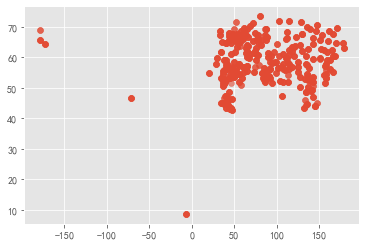

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=2020, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<Figure size 576x360 with 0 Axes>

(Text(0.5, 0, '经度'), Text(0, 0.5, '纬度'))

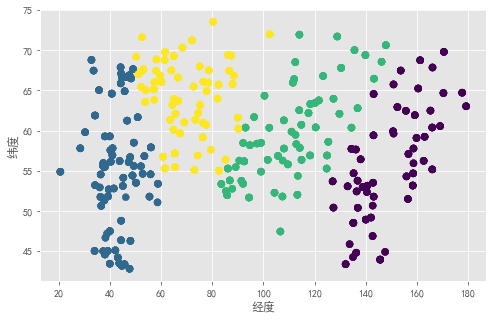

Year  Area
2016  0        81012.20
      1       464529.19
      2        57064.97
      3        76763.79
2017  0        85778.31
      1       550855.88
      2        56900.07
      3        80128.02
2018  0        77532.06
      1       561214.22
      2        51568.32
      3        76780.68
2019  0        79319.66
      1       554261.59
      2        51833.75
      3        79042.27
Name: Whole year, dtype: float64

In [453]:
# 1. 聚类方法划分区域
## 取出经纬度
Area = RAS[(RAS['Airport coordinates'] != 'Not found') & (RAS['Year']>=2016) & (RAS['Year']<=2019)]
Area['Airport coordinates'] = Area['Airport coordinates'].\
apply(lambda x:[float(f) for f in x.replace("(Decimal('","").replace("'), Decimal('",",").replace("'))","").split(',')])

Area['longitude'] = [Area['Airport coordinates'][i][0] for i in Area.index]
Area['latitude'] = [Area['Airport coordinates'][i][1] for i in Area.index]

## 画分布图
plt.scatter(Area['longitude'], Area['latitude'], alpha=0.6)  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.show()

## 建模聚类
from sklearn.mixture import GaussianMixture
data_x = Area[['longitude','latitude']] # 不筛选，取全部的数据
data_x = Area[(Area['longitude'] > 0)][['latitude','longitude']] # 筛选经度大于0

### 模型创建及训练
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=2020)
gmm.fit(data_x)
y_hat = gmm.predict(data_x) # y_hat就是分类标志

### 聚类效果图
plt.figure(num=1, figsize=(8, 5))
plt.xlabel('经度'), plt.ylabel('纬度')
plt.scatter(data_x['longitude'], data_x['latitude'],c=y_hat, label=y_hat, s=50, cmap='viridis')
plt.show()

## 按区域统计
Area = Area[(Area['longitude'] > 0)]
Area['Area'] =  y_hat
Area.groupby(['Year','Area'])['Whole year'].sum()

### (6) 在统计学中常常用秩代表排名，现在规定某个机场某年某个月的秩为该机场该月在当年所有月份中货运量的排名（例如 *** 机场 19 年 1 月运量在整个 19 年 12 个月中排名第一，则秩为 1），那么判断某月运量情况的相对大小的秩方法为将所有机场在该月的秩排名相加，并将这个量定义为每一个月的秩综合指数，请根据上述定义计算 2016 年 12 个月的秩综合指数。  
(考察点：分组，合并，排序)

In [245]:
# a. 将月份由列转成行
col = RAS.loc[:,'January':'December'].columns
Rank = RAS[RAS['Year'] == 2016].melt(id_vars=['Airport name'],value_vars=col,value_name='Shipping volume')
## 数据有重复，汇总计算
Rank = Rank.groupby(['Airport name','variable']).sum().reset_index() #rank(method='min') #.sort_values(by=['variable'])

# b. 所有机场在单个月排名
## rank函数
Rank = Rank.join(Rank.groupby(['Airport name']).rank(method='min'), rsuffix='_rank').sort_values(by=['Airport name','variable'])

# c. 按月汇总求指数
Rank.groupby('variable')['Shipping volume_rank'].sum()


variable
April        685.0
August       687.0
December     889.0
February     491.0
January      386.0
July         587.0
June         617.0
March        612.0
May          615.0
November     808.0
October      755.0
September    720.0
Name: Shipping volume_rank, dtype: float64

## 三、新冠肺炎在美国的传播

In [118]:
# USCOV = COVID-19 in US
USCOV_diagnose = pd.read_csv('./美国确证数.csv')
USCOV_diagnose.head()
USCOV_diagnose.info()

USCOV_death = pd.read_csv('./美国死亡数.csv')
USCOV_death.head()
USCOV_death.info()

# 死亡数和确诊数都按累计值处理

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,2020/1/31,2020/2/1,2020/2/2,2020/2/3,2020/2/4,2020/2/5,2020/2/6,2020/2/7,2020/2/8,2020/2/9,2020/2/10,2020/2/11,2020/2/12,2020/2/13,2020/2/14,2020/2/15,2020/2/16,2020/2/17,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,2020/2/26,2020/2/27,2020/2/28,2020/2/29,2020/3/1,2020/3/2,2020/3/3,2020/3/4,2020/3/5,2020/3/6,2020/3/7,2020/3/8,2020/3/9,2020/3/10,2020/3/11,2020/3/12,2020/3/13,2020/3/14,2020/3/15,2020/3/16,2020/3/17,2020/3/18,2020/3/19,2020/3/20,2020/3/21,2020/3/22,2020/3/23,2020/3/24,2020/3/25,2020/3/26,2020/3/27,2020/3/28,2020/3/29,2020/3/30,2020/3/31,2020/4/1,2020/4/2,2020/4/3,2020/4/4,2020/4/5,2020/4/6,2020/4/7,2020/4/8,2020/4/9,2020/4/10,2020/4/11,2020/4/12,2020/4/13,2020/4/14,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26
0,84001001,US,USA,840,1001,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37
1,84001003,US,USA,840,1003,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161
2,84001005,US,USA,840,1005,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33
3,84001007,US,USA,840,1007,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38
4,84001009,US,USA,840,1009,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 107 entries, UID to 2020/4/26
dtypes: float64(2), int64(99), object(6)
memory usage: 2.6+ MB


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,2020/1/31,2020/2/1,2020/2/2,2020/2/3,2020/2/4,2020/2/5,2020/2/6,2020/2/7,2020/2/8,2020/2/9,2020/2/10,2020/2/11,2020/2/12,2020/2/13,2020/2/14,2020/2/15,2020/2/16,2020/2/17,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,2020/2/26,2020/2/27,2020/2/28,2020/2/29,2020/3/1,2020/3/2,2020/3/3,2020/3/4,2020/3/5,2020/3/6,2020/3/7,2020/3/8,2020/3/9,2020/3/10,2020/3/11,2020/3/12,2020/3/13,2020/3/14,2020/3/15,2020/3/16,2020/3/17,2020/3/18,2020/3/19,2020/3/20,2020/3/21,2020/3/22,2020/3/23,2020/3/24,2020/3/25,2020/3/26,2020/3/27,2020/3/28,2020/3/29,2020/3/30,2020/3/31,2020/4/1,2020/4/2,2020/4/3,2020/4/4,2020/4/5,2020/4/6,2020/4/7,2020/4/8,2020/4/9,2020/4/10,2020/4/11,2020/4/12,2020/4/13,2020/4/14,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26
0,84001001,US,USA,840,1001,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2
1,84001003,US,USA,840,1003,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3
2,84001005,US,USA,840,1005,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84001007,US,USA,840,1007,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84001009,US,USA,840,1009,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 108 entries, UID to 2020/4/26
dtypes: float64(2), int64(100), object(6)
memory usage: 2.6+ MB


### (1) 用 corr() 函数计算县（每行都是一个县）人口与表中最后一天记录日期死亡数的相关系数。  
(考察点：corr函数)

,Population,2020/4/26
Population,1.000000,0.403844
2020/4/26,0.403844,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001521A0957B8>,
      dtype=object)

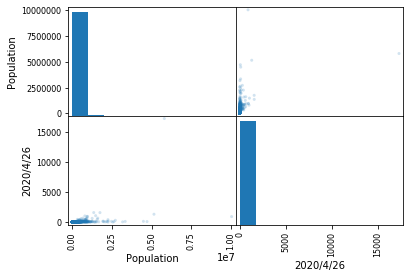

In [84]:
USCOV_death[['Population','2020/4/26']].corr()

from pandas.plotting import scatter_matrix
scatter_matrix(USCOV_death[['Population','2020/4/26']], alpha=0.2)

### (2) 截止到 4 月 1 日，统计每个州零感染县的比例。  
 (考察点：分组，筛选，创建列) 

In [169]:
# a.先汇总计算截止到4月1日，感染总人数
Total = USCOV_diagnose.groupby(['Province_State','Admin2'])['2020/4/1'].sum().reset_index()

# b.计算0感染的县的个数
# Total[Total['2020/4/1'] == 0].groupby(['Province_State'])['2020/4/1'].count()

# c.计算每个州县的总个数
#Total.groupby(['Province_State'])['2020/4/1'].count()

# e.计算比例
(Total[Total['2020/4/1'] == 0].groupby(['Province_State'])['2020/4/1'].count() \
/ Total.groupby(['Province_State'])['2020/4/1'].count()).fillna(0)

## NaN代表为0

Province_State
Alabama                 0.119403
Alaska                  0.793103
Arizona                 0.000000
Arkansas                0.293333
California              0.137931
Colorado                0.218750
Connecticut             0.000000
Delaware                0.000000
District of Columbia    0.000000
Florida                 0.164179
Georgia                 0.125786
Hawaii                  0.200000
Idaho                   0.386364
Illinois                0.480392
Indiana                 0.108696
Iowa                    0.404040
Kansas                  0.609524
Kentucky                0.441667
Louisiana               0.062500
Maine                   0.250000
Maryland                0.041667
Massachusetts           0.142857
Michigan                0.192771
Minnesota               0.367816
Mississippi             0.060976
Missouri                0.391304
Montana                 0.625000
Nebraska                0.752688
Nevada                  0.470588
New Hampshire           0.10

### (3) 请找出最早出确证病例的三个县。  
 (考察点：筛选，转换，索引)   

In [125]:
# 思路一，按时间从前往后一个个看，各时间非0的计数，最早的三个
## 不止要判断时间，还要判断县名是不是重复
#USCOV_diagnose[USCOV_diagnose['2020/1/22'] != 0]['2020/1/22'].count()
#USCOV_diagnose[USCOV_diagnose['2020/1/22'] != 0]
#USCOV_diagnose[USCOV_diagnose['2020/1/23'] != 0]['2020/1/23'].count()
#USCOV_diagnose[USCOV_diagnose['2020/1/23'] != 0]
#USCOV_diagnose[USCOV_diagnose['2020/1/24'] != 0]['2020/1/24'].count()
#USCOV_diagnose[USCOV_diagnose['2020/1/24'] != 0]
#USCOV_diagnose[USCOV_diagnose['2020/1/25'] != 0]['2020/1/25'].count()
#USCOV_diagnose[USCOV_diagnose['2020/1/25'] != 0]

# 思路二，利用循环判断
#n = 0
#for col in USCOV_diagnose.loc[:,'2020/1/22':'2020/4/24'].columns: 
#    if USCOV_diagnose[USCOV_diagnose[col] != 0][col].count() =3:
#        USCOV_diagnose[USCOV_diagnose[col] != 0]['Admin2']
#        n = n + USCOV_diagnose[USCOV_diagnose[col] != 0][col].count()
#    if n >=3:
#        break
        
for col in USCOV_diagnose.loc[:,'2020/1/22':'2020/4/26'].columns: 
    if USCOV_diagnose[USCOV_diagnose[col] != 0][col].count() >= 3:
        USCOV_diagnose[USCOV_diagnose[col] != 0]
        break       
        

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,2020/1/31,2020/2/1,2020/2/2,2020/2/3,2020/2/4,2020/2/5,2020/2/6,2020/2/7,2020/2/8,2020/2/9,2020/2/10,2020/2/11,2020/2/12,2020/2/13,2020/2/14,2020/2/15,2020/2/16,2020/2/17,2020/2/18,2020/2/19,2020/2/20,2020/2/21,2020/2/22,2020/2/23,2020/2/24,2020/2/25,2020/2/26,2020/2/27,2020/2/28,2020/2/29,2020/3/1,2020/3/2,2020/3/3,2020/3/4,2020/3/5,2020/3/6,2020/3/7,2020/3/8,2020/3/9,2020/3/10,2020/3/11,2020/3/12,2020/3/13,2020/3/14,2020/3/15,2020/3/16,2020/3/17,2020/3/18,2020/3/19,2020/3/20,2020/3/21,2020/3/22,2020/3/23,2020/3/24,2020/3/25,2020/3/26,2020/3/27,2020/3/28,2020/3/29,2020/3/30,2020/3/31,2020/4/1,2020/4/2,2020/4/3,2020/4/4,2020/4/5,2020/4/6,2020/4/7,2020/4/8,2020/4/9,2020/4/10,2020/4/11,2020/4/12,2020/4/13,2020/4/14,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26
103,84004013,US,USA,840,4013,Maricopa,Arizona,US,33.348359,-112.491815,"Maricopa, Arizona, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,4,8,9,11,22,34,49,81,139,199,251,299,399,454,545,690,788,871,961,1049,1171,1326,1433,1495,1559,1689,1741,1891,1960,2020,2056,2146,2264,2404,2491,2589,2636,2738,2846,2970,3116,3234,3359
204,84006037,US,USA,840,6037,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,11,13,14,14,14,20,27,32,40,53,53,94,144,190,231,292,292,407,536,662,812,1229,1465,1465,1829,2474,3019,3518,4045,4566,4605,5955,6377,6936,7559,7955,8443,8453,8894,9433,10047,10517,10854,11400,12021,12341,13823,15153,16447,17537,18545,19133,19567
215,84006059,US,USA,840,6059,Orange,California,US,33.701475,-117.764600,"Orange, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,4,5,5,6,9,14,14,17,22,29,53,65,78,95,125,152,187,256,321,403,431,464,502,606,656,711,786,834,882,931,1016,1079,1138,1221,1277,1283,1299,1376,1425,1501,1556,1636,1676,1691,1753,1827,1845,1969,2074
610,84017031,US,USA,840,17031,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,5,5,6,7,7,11,22,27,40,50,50,62,107,178,278,278,548,805,922,1194,1418,1418,2239,2613,3445,3727,4496,5152,5575,6111,7439,8034,8728,9509,10520,11415,12472,13417,14585,15474,16323,17306,18087,19391,20395,21272,22101,23181,24546,25811,27616,29058,30574
2969,84053033,US,USA,840,53033,King,Washington,US,47.491379,-121.834613,"King, Washington, US",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,9,14,21,31,51,58,71,83,83,116,190,270,328,387,387,488,569,562,693,793,934,1040,1170,1170,1359,1577,1577,2077,2159,2161,2330,2330,2656,2787,2898,3167,3331,3486,3688,3886,4117,4262,4426,4426,4549,4620,4697,4902,4902,5174,5174,5293,5379,5532,5637,5739,5863


### (4) 按州统计单日确诊增加数，并给出哪个州在哪一天确诊数增加最大（这里指的是在所有州和所有天两个指标一起算，不是分别算）。
 (考察点：分组，索引，差分，转换，筛选)   


In [179]:
# a. 将日期由列转为行
col = USCOV_diagnose.loc[:,'2020/1/22':'2020/4/26'].columns
diagnose = USCOV_diagnose.melt(id_vars=['Province_State'],value_vars=col,value_name='Number')
## 默认的日期是文本类型，4/2 后面是4/20日， 先转成日期格式
diagnose['variable'] = pd.to_datetime(diagnose['variable'])
diagnose = diagnose.groupby(['Province_State','variable']).sum()


# b. 差分
## 如果是1/22取0
## 完全正确的做法是应该用if判断，如果是1/22号就取0，但是现在不影响结果，因为一定是负数
diagnose['Number'].diff().max() #4.15 4.20

# c.判断最大值
diagnose[diagnose['Number'].diff() == diagnose['Number'].diff().max()]

11434.0

,,Number
Province_State,variable,
New York,2020-04-15,214454


### (5) 现需对每个州编制确证与死亡表，第一列为时间，并且起始时间为该州开始出现死亡比例的那一天，第二列和第三列分别为确证数和死亡数, 每个州需要保存为一个单独的 csv 文件，文件名为“州名.csv”。    
 (考察点：分组，索引，转换，循环，文件写入输出)   


In [187]:
# a. 按洲汇总统计确诊人数和死亡人数
col = USCOV_diagnose.loc[:,'2020/1/22':'2020/4/26'].columns
diagnose = USCOV_diagnose.melt(id_vars=['Province_State'],value_vars=col,value_name='diagnose')
diagnose = diagnose.groupby(['Province_State','variable']).sum()
diagnose = diagnose.reset_index()
diagnose

col = USCOV_death.loc[:,'2020/1/22':'2020/4/26'].columns
death = USCOV_death.melt(id_vars=['Province_State'],value_vars=col,value_name='death')
death = death.groupby(['Province_State','variable']).sum()
death = death.reset_index()
death

# b. 拼接
## 死亡人数统计表要去除0的
death = death[death['death'] != 0]

All = pd.merge(death, diagnose, on=['Province_State','variable'])
All

# e. 写入文件并输出
for province in set(All['Province_State'].values):
    data = All[All['Province_State'] == province][['variable','diagnose', 'death']]
    data.to_csv("./练习/" + province + '.csv')

,Province_State,variable,diagnose
0,Alabama,2020/1/22,0
1,Alabama,2020/1/23,0
2,Alabama,2020/1/24,0
3,Alabama,2020/1/25,0
4,Alabama,2020/1/26,0
...,...,...,...
4891,Wyoming,2020/4/5,197
4892,Wyoming,2020/4/6,210
4893,Wyoming,2020/4/7,216
4894,Wyoming,2020/4/8,221


,Province_State,variable,death
0,Alabama,2020/1/22,0
1,Alabama,2020/1/23,0
2,Alabama,2020/1/24,0
3,Alabama,2020/1/25,0
4,Alabama,2020/1/26,0
...,...,...,...
4891,Wyoming,2020/4/5,0
4892,Wyoming,2020/4/6,0
4893,Wyoming,2020/4/7,0
4894,Wyoming,2020/4/8,0


,Province_State,variable,death,diagnose
0,Alabama,2020/3/25,1,381
1,Alabama,2020/3/26,1,517
2,Alabama,2020/3/27,4,587
3,Alabama,2020/3/28,4,694
4,Alabama,2020/3/29,10,825
...,...,...,...,...
1935,Wyoming,2020/4/22,1,447
1936,Wyoming,2020/4/23,1,453
1937,Wyoming,2020/4/24,1,473
1938,Wyoming,2020/4/25,1,491


### (6) 现需对 4 月 1 日至 4 月 10 日编制新增确证数与新增死亡数表，第一列为州名，第二列和第三列分别为新增确证数和新增死亡数，分别保存为十个单独的 csv 文件，文件名为“日期.csv”。  
  (考察点：分组，索引，转换，循环，文件写入输出) 
  

In [202]:
# a. 日期转为行
col = USCOV_diagnose.loc[:,'2020/3/31':'2020/4/10'].columns
diagnose = USCOV_diagnose.melt(id_vars=['Province_State'],value_vars=col,value_name='diagnose')
diagnose['variable'] = pd.to_datetime(diagnose['variable']) # date类型
diagnose = diagnose.groupby(['Province_State','variable']).sum()


col = USCOV_death.loc[:,'2020/3/31':'2020/4/10'].columns
death = USCOV_death.melt(id_vars=['Province_State'],value_vars=col,value_name='death')
death['variable'] = pd.to_datetime(death['variable']) # date类型
death = death.groupby(['Province_State','variable']).sum()


# b. 差分
## 要日期排序正确再差分
diagnose = diagnose.reset_index()
diagnose['diagnose_diff'] = diagnose['diagnose'].diff()
diagnose = diagnose[diagnose['variable'] != '2020-03-31'] 
diagnose

death = death.reset_index()
death['death_diff'] = death['death'].diff()
death = death[death['variable'] != '2020-03-31'] 
death

# c. 拼接
All = pd.merge(death, diagnose, on=['Province_State','variable'])
All

# d. 写入文件并输出
All['variable'] = All['variable'].dt.strftime('%Y%m%d') # 时间戳转为数字格式
for date in set(All['variable'].values):
    data = All[All['variable'] == date][['variable','diagnose_diff', 'death_diff']]
    data.to_csv("./练习/" + date + '.csv')

,Province_State,variable,diagnose,diagnose_diff
1,Alabama,2020-04-01,1060,73.0
2,Alabama,2020-04-02,1233,173.0
3,Alabama,2020-04-03,1495,262.0
4,Alabama,2020-04-04,1614,119.0
5,Alabama,2020-04-05,1765,151.0
...,...,...,...,...
556,Wyoming,2020-04-06,210,13.0
557,Wyoming,2020-04-07,216,6.0
558,Wyoming,2020-04-08,221,5.0
559,Wyoming,2020-04-09,230,9.0


,Province_State,variable,death,death_diff
1,Alabama,2020-04-01,27,12.0
2,Alabama,2020-04-02,27,0.0
3,Alabama,2020-04-03,38,11.0
4,Alabama,2020-04-04,44,6.0
5,Alabama,2020-04-05,45,1.0
...,...,...,...,...
556,Wyoming,2020-04-06,0,0.0
557,Wyoming,2020-04-07,0,0.0
558,Wyoming,2020-04-08,0,0.0
559,Wyoming,2020-04-09,0,0.0


,Province_State,variable,death,death_diff,diagnose,diagnose_diff
0,Alabama,2020-04-01,27,12.0,1060,73.0
1,Alabama,2020-04-02,27,0.0,1233,173.0
2,Alabama,2020-04-03,38,11.0,1495,262.0
3,Alabama,2020-04-04,44,6.0,1614,119.0
4,Alabama,2020-04-05,45,1.0,1765,151.0
...,...,...,...,...,...,...
505,Wyoming,2020-04-06,0,0.0,210,13.0
506,Wyoming,2020-04-07,0,0.0,216,6.0
507,Wyoming,2020-04-08,0,0.0,221,5.0
508,Wyoming,2020-04-09,0,0.0,230,9.0
